In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Read and Explore the Data A Bit

In [3]:
df_data = pd.read_csv("../data/week8_data.csv")

In [4]:
df_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

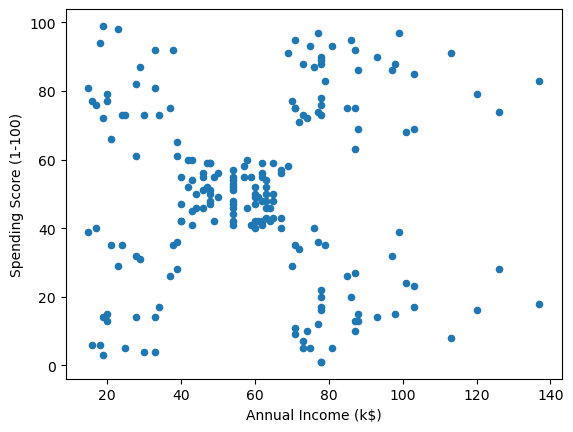

In [5]:
df_data.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)")

**Think: Any intuitive guess? How many clusters do you want to start with?**

I think there are 5 clusters from observing from face value. I will start with 5

## K_Means practice

In [6]:
def plot_cluster_range(data_cluster, cluster_clf):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data_cluster[:, 0].min() - 1, data_cluster[:, 0].max() + 1
    y_min, y_max = data_cluster[:, 1].min() - 1, data_cluster[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = cluster_clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.imshow(Z, interpolation="nearest",
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect="auto", origin="lower")

    plt.plot(data_cluster[:, 0], data_cluster[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = cluster_clf.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
                color="w", zorder=10)
    plt.title("K-means Clustering Bond")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

In [7]:
data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].values.copy()

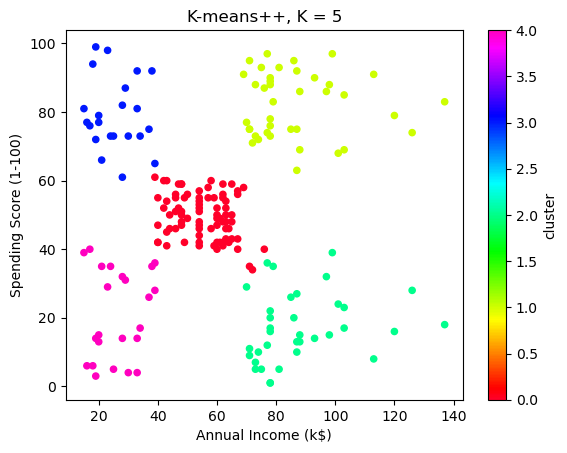

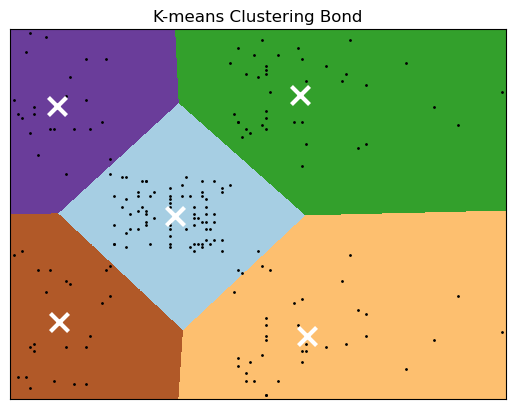

In [8]:
# A quick plot. k = 5. initializing w/ k-means++
num_clusters = 5

np.random.seed(200)
cluster_kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++')

cluster_kmeans = cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_kmeans_plus_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("K-means++, K = 5")
plt.show()

plot_cluster_range(data_cluster, cluster_kmeans)

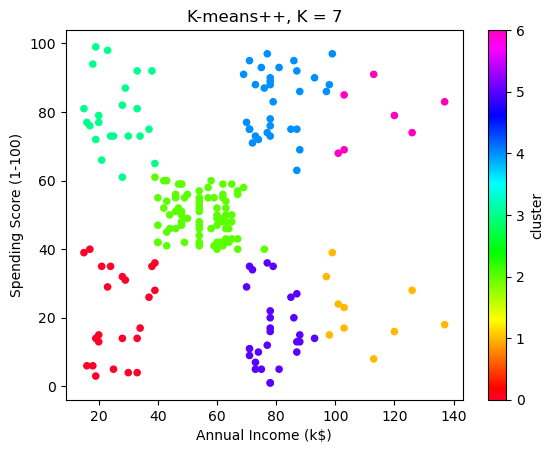

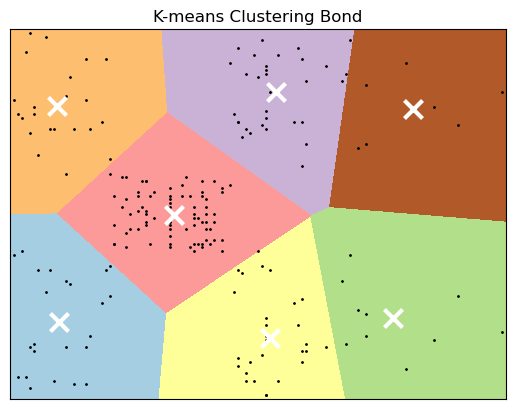

In [9]:
np.random.seed(200)
num_clusters = 7

cluster_kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++')

cluster_kmeans = cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_kmeans_plus_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("K-means++, K = 7")
plt.show()

plot_cluster_range(data_cluster, cluster_kmeans)

When k increases, the number of cluster groups increase. So now there are 7 total clusters since I changed k to 7. However, the higher the k doesn't always mean the better as it could "memorize" and overfit

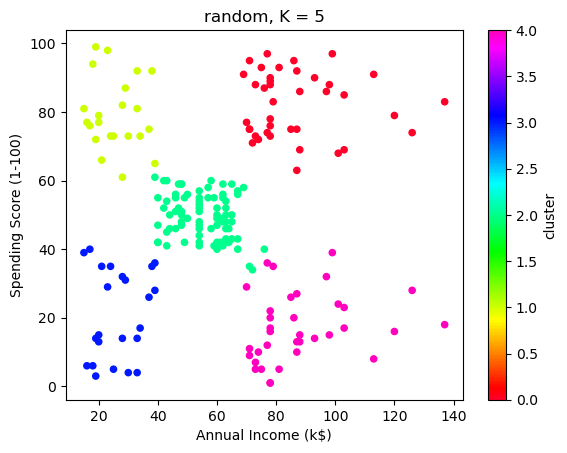

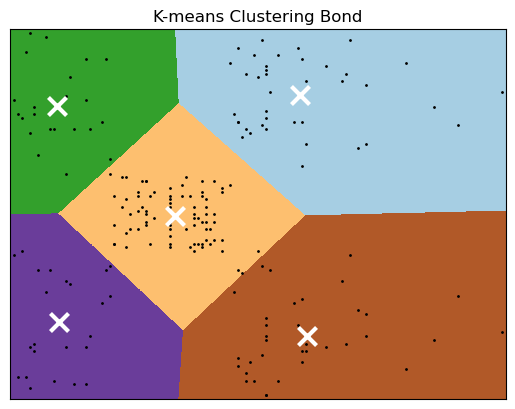

In [10]:
np.random.seed(200)
num_clusters = 5

cluster_kmeans = KMeans(n_clusters = num_clusters, init = "random")

cluster_kmeans = cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_kmeans_plus_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("random, K = 5")
plt.show()

plot_cluster_range(data_cluster, cluster_kmeans)

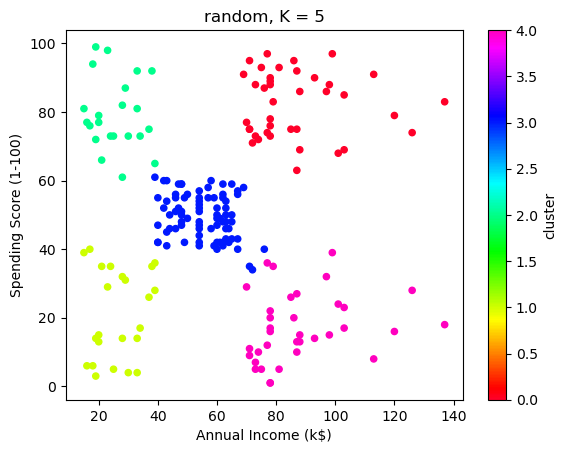

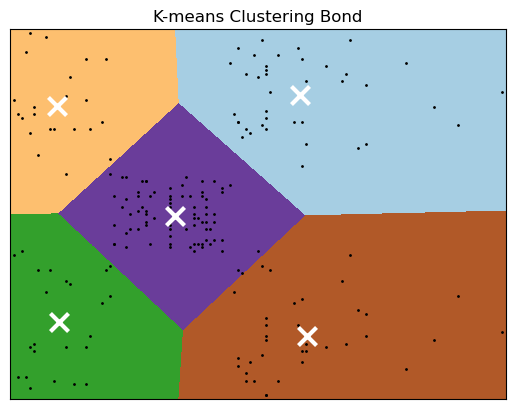

In [11]:
np.random.seed(371) # new seed!
num_clusters = 5

cluster_kmeans = KMeans(n_clusters = num_clusters, init = "random")

cluster_kmeans = cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_kmeans_plus_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("random, K = 5")
plt.show()

plot_cluster_range(data_cluster, cluster_kmeans)

There seems to be minimal difference from changing init to random from k-means++. Almost no change is visible

# Elbow method

[Documentation: sklearn.clustering.kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

1. I will select a reasonable value of k to iterate over `k_range`
2. fit Kmeans with each value of k (use k-means++ for initialization)
3. calculate sum of squared distances of samples to their closest cluster center, add to `sse` list
4. Review elbow plot to select `k`

Text(0, 0.5, 'SSE')

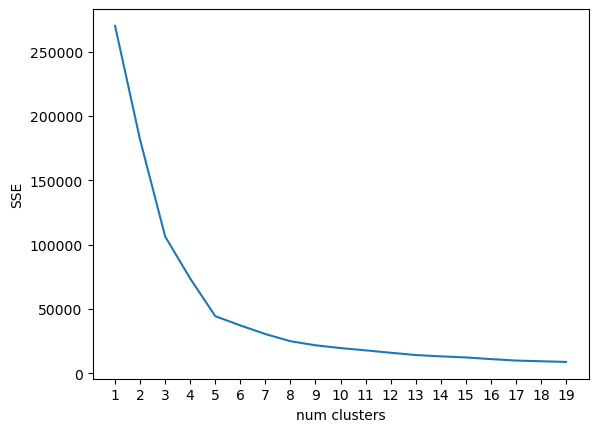

In [12]:
sse = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(data_cluster)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse)
plt.xticks(k_range)
plt.xlabel('num clusters')
plt.ylabel('SSE')

We can see that the elbow is at around 5, the rate of change decreases sharply around 5. However, when I am picking k I would choose a k from 5-8.

## Hierarchical Clustering

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    from scipy.cluster.hierarchy import dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

### Determine the number of clusters

In [14]:
data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].values.copy()

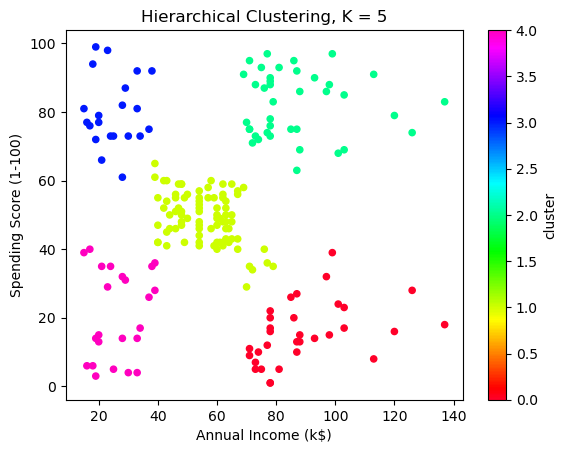

In [15]:
# A quick plot

num_clusters = 5

np.random.seed(200)
cluster_hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, K = 5")
plt.show()

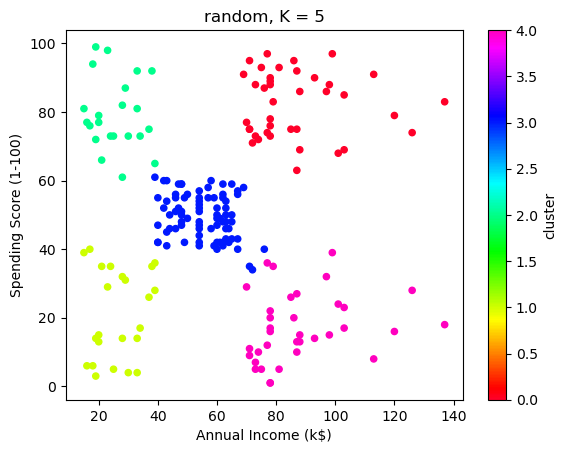

In [16]:
fig_kmeans_plus_5

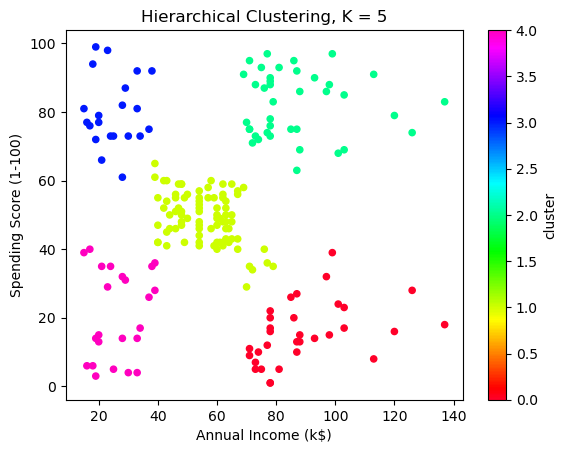

In [17]:
fig_hie_5

## I'll do it with a different number of clusters. And compare it to k-means.

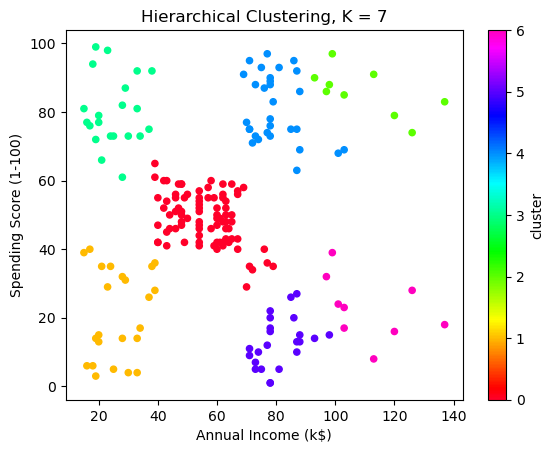

In [18]:
num_clusters = 7 # TODO: change to different num of clusters
np.random.seed(200)
cluster_hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, K = 7")
plt.show()

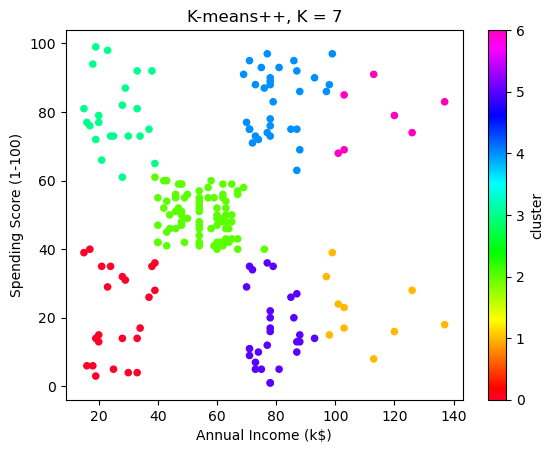

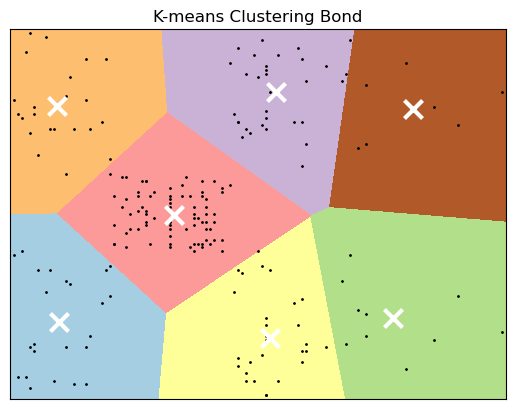

In [19]:
np.random.seed(200)
num_clusters = 7

cluster_kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++')

cluster_kmeans = cluster_kmeans.fit(data_cluster)
clusters_pred = cluster_kmeans.predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_kmeans_plus_5, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("K-means++, K = 7")
plt.show()

plot_cluster_range(data_cluster, cluster_kmeans)

There are more pronounced differences when comparing k-means to hierarchical clustering. The main difference I can see is the boundaries for each cluster. There is some variation from the model between clustering types with boundaries especially regarding the clusters on the left-hand side of the graph.

### Merge distance threshold

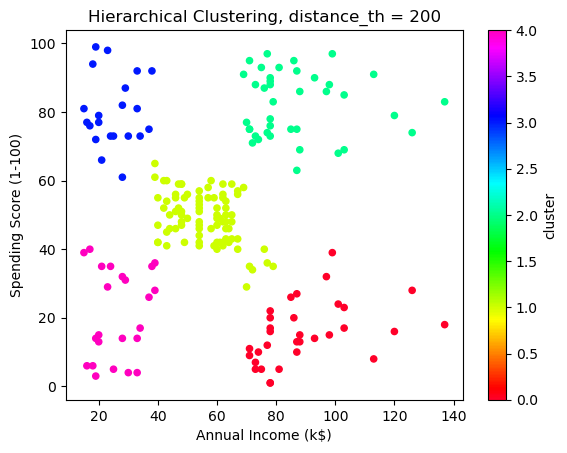

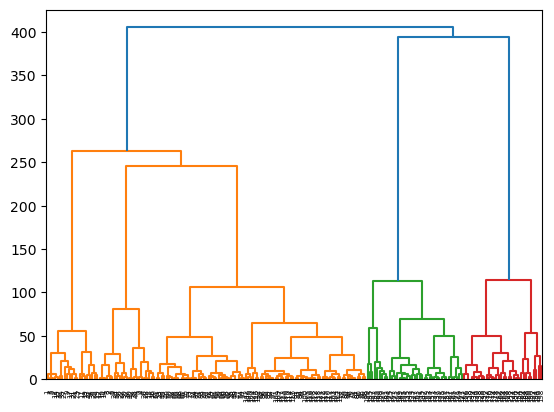

In [20]:
# A quick plot

distance_threshold = 200

np.random.seed(20)
cluster_hierarchical = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_dis200, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, distance_th = 200")
plt.show()

plot_dendrogram(cluster_hierarchical)

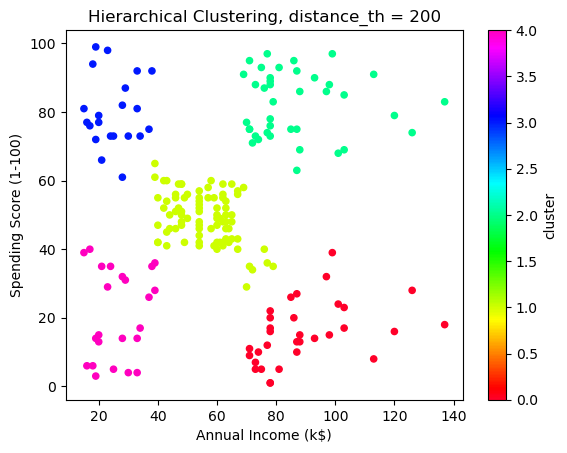

In [21]:
fig_hie_dis200

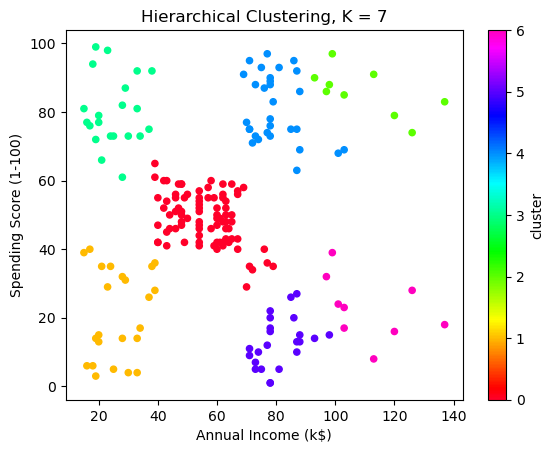

In [22]:
fig_hie_5

## Different distance threshold.

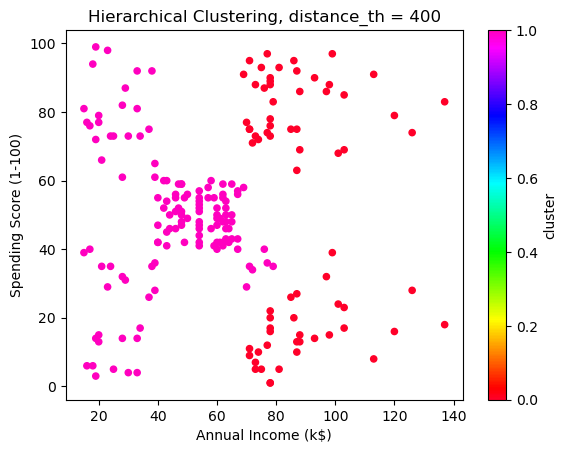

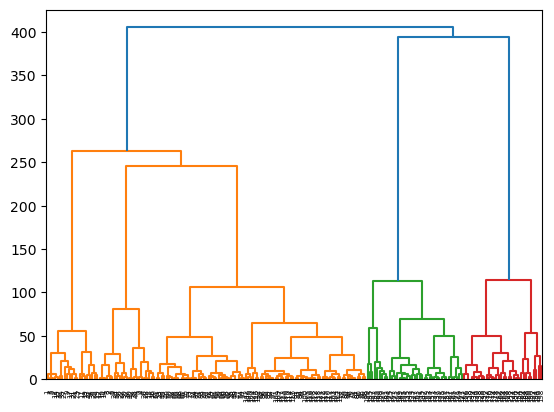

In [23]:
np.random.seed(200)
distance_threshold = 400 # TODO: change to different threshold

cluster_hierarchical = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_dis200, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, distance_th = 400")
plt.show()

plot_dendrogram(cluster_hierarchical)


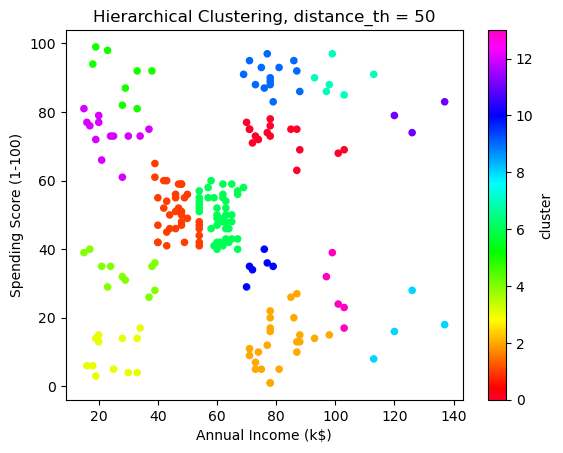

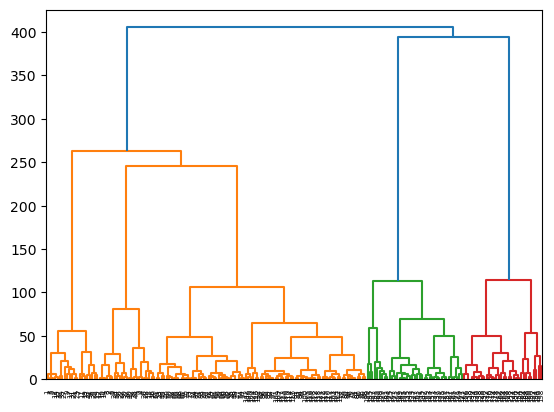

In [25]:
np.random.seed(200)
distance_threshold = 50 # TODO: try another threshold!

cluster_hierarchical = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, affinity='euclidean')

clusters_pred = cluster_hierarchical.fit_predict(data_cluster)
df_data_cluster = df_data[["Annual Income (k$)","Spending Score (1-100)"]].copy()
df_data_cluster["cluster"] = clusters_pred

fig_hie_dis200, ax = plt.subplots()
df_data_cluster.plot.scatter(x = "Annual Income (k$)",y="Spending Score (1-100)", c = "cluster", cmap = "gist_rainbow", ax = ax)
ax.set_title("Hierarchical Clustering, distance_th = 50")
plt.show()

plot_dendrogram(cluster_hierarchical)

When I increase the distance threshhold, I observed the number of clusters decreases which made the clusters bigger most likely because more data points were included in the max distance criteria. On the other hand when I decrease the distance thresholf, I observed more clusters of smaller sizes and it became more specific. A smaller distance threshold can lead to overfitting while a larger one can lead to underfitting.